In [1]:
#importing necessary librarires

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [2]:
# Assuming the data is in a CSV file named credit_card_default_dataset
file_path = 'data_analysis/datasets/raw/credit_card_default_dataset.csv'
data = pd.read_csv(file_path)
print(data)

      Client_ID  Age  Gender  Credit_Limit  Balance_Amount  Payment_History  \
0       C000001   56  Female         32347           24030         0.777822   
1       C000002   69    Male         20684           34656         0.864744   
2       C000003   46  Female         26735           24739         0.795358   
3       C000004   32    Male         10100           41361         0.772818   
4       C000005   60    Male         24268           18916         0.660291   
...         ...  ...     ...           ...             ...              ...   
29995   C029996   30  Female         13151           50246         0.668236   
29996   C029997   33    Male         61598           61056         0.848533   
29997   C029998   47    Male         27871           18773         0.625523   
29998   C029999   57    Male         30363           71957         0.591471   
29999   C030000   25  Female         96679           85078         0.631810   

       Late_Payment_Count  Income_Level  Loan_to_In

In [3]:
#Data Exploration

# Display the first few rows of the dataset
print(data.head())

# Get basic information about the dataset
print(data.info())

# Summary statistics of the dataset
print(data.describe())

# Check for missing values
print(data.isnull().sum())

  Client_ID  Age  Gender  Credit_Limit  Balance_Amount  Payment_History  \
0   C000001   56  Female         32347           24030         0.777822   
1   C000002   69    Male         20684           34656         0.864744   
2   C000003   46  Female         26735           24739         0.795358   
3   C000004   32    Male         10100           41361         0.772818   
4   C000005   60    Male         24268           18916         0.660291   

   Late_Payment_Count  Income_Level  Loan_to_Income_Ratio  Default_Status  
0                   0        148144              0.367570               0  
1                   7        191248              0.232899               1  
2                   6         73660              0.954680               1  
3                   9         46777              0.657563               1  
4                   7         85372              0.336417               1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (tot

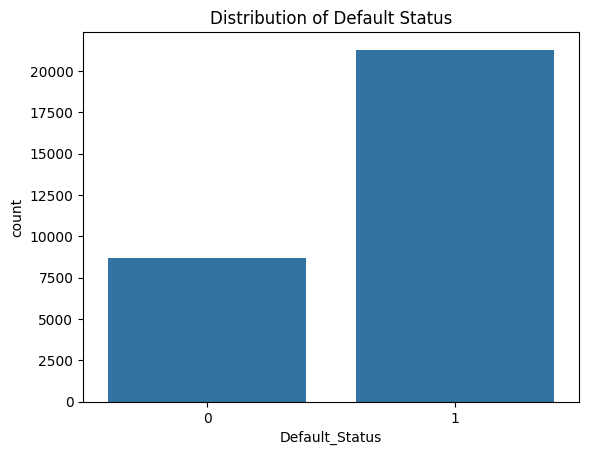

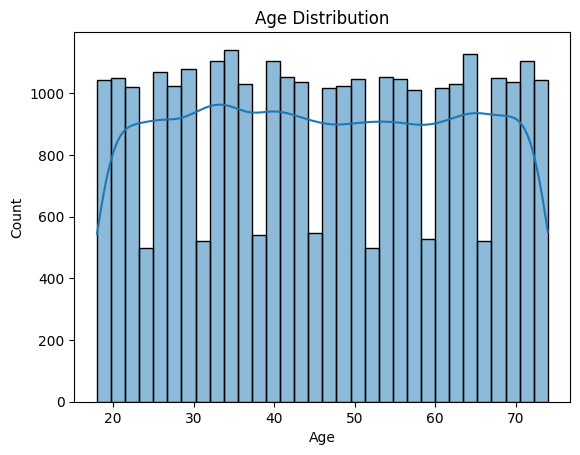

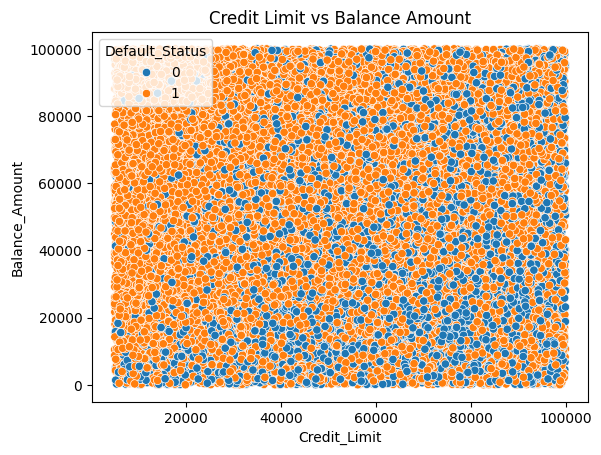

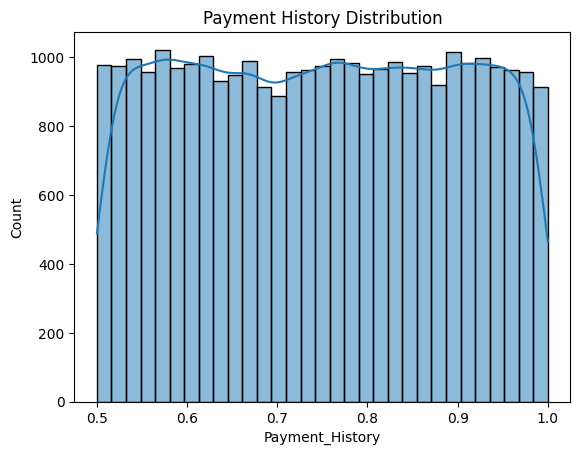

In [4]:
# Data Visualization

# Distribution of the target variable
sns.countplot(x='Default_Status', data=data)
plt.title('Distribution of Default Status')
plt.show()

# Age distribution
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Credit Limit vs Balance Amount
sns.scatterplot(x='Credit_Limit', y='Balance_Amount', hue='Default_Status', data=data)
plt.title('Credit Limit vs Balance Amount')
plt.show()

# Payment History distribution
sns.histplot(data['Payment_History'], kde=True)
plt.title('Payment History Distribution')
plt.show()

In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Load the dataset

df = pd.read_csv(file_path)

# Remove Client_ID column
df.drop(columns=['Client_ID'], inplace=True)

# Encode Gender (Male = 0, Female = 1)
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Scale numerical features
scaler = MinMaxScaler()
numeric_cols = ['Credit_Limit', 'Balance_Amount', 'Payment_History', 'Late_Payment_Count', 
                'Income_Level', 'Loan_to_Income_Ratio']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Check for duplicates and remove if any
df.drop_duplicates(inplace=True)

# Display the first few rows after preprocessing
print(df.head())


   Age  Gender  Credit_Limit  Balance_Amount  Payment_History  \
0   56       0      0.287865        0.240299         0.555634   
1   69       1      0.165091        0.346568         0.729487   
2   46       0      0.228789        0.247390         0.590709   
3   32       1      0.053676        0.413623         0.545627   
4   60       1      0.202819        0.189155         0.320565   

   Late_Payment_Count  Income_Level  Loan_to_Income_Ratio  Default_Status  
0            0.000000      0.711937              0.367569               0  
1            0.636364      0.951415              0.232894               1  
2            0.545455      0.298119              0.954695               1  
3            0.818182      0.148762              0.657570               1  
4            0.636364      0.363188              0.336415               1  


In [6]:
# Data Preprocessing

import pandas as pd

# Load the dataset
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Drop non-relevant column
df.drop(columns=["Client_ID"], inplace=True)

# Encode categorical variable "Gender"
label_encoder = LabelEncoder()
df["Gender"] = label_encoder.fit_transform(df["Gender"])  # Male=1, Female=0

# Split data into features and target
X = df.drop(columns=["Default_Status"])
y = df["Default_Status"]

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define models to test
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Sort models by accuracy
sorted_results = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))
sorted_results

print("This script loads the dataset, preprocesses it by removing unnecessary columns, encoding categorical variables, scaling numerical features, and checking for duplicates") 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Client_ID             30000 non-null  object 
 1   Age                   30000 non-null  int64  
 2   Gender                30000 non-null  object 
 3   Credit_Limit          30000 non-null  int64  
 4   Balance_Amount        30000 non-null  int64  
 5   Payment_History       30000 non-null  float64
 6   Late_Payment_Count    30000 non-null  int64  
 7   Income_Level          30000 non-null  int64  
 8   Loan_to_Income_Ratio  30000 non-null  float64
 9   Default_Status        30000 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 2.3+ MB


XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/daniloangeltitorodriguez/Library/Mobile Documents/com~apple~CloudDocs/NCI  AI MASTER/Data Analytics AI/financial-risk-ml/.venv/lib/python3.12/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <54A1AE05-1E14-3DA2-A8D0-062134694298> /Users/daniloangeltitorodriguez/Library/Mobile Documents/com~apple~CloudDocs/NCI  AI MASTER/Data Analytics AI/financial-risk-ml/.venv/lib/python3.12/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file)"]


In [ ]:
#implementation of SVM (Support Vector Machine) Algorithm

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv(file_path)

# Drop Client_ID (not useful for modeling)
df = df.drop(columns=['Client_ID'])

# Encode categorical variable (Gender)
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])  # Female = 0, Male = 1

# Split dataset into features and target variable
X = df.drop(columns=['Default_Status'])
y = df['Default_Status']

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (SVM performs better with scaled data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.9895
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1776
           1       0.99      0.99      0.99      4224

    accuracy                           0.99      6000
   macro avg       0.99      0.99      0.99      6000
weighted avg       0.99      0.99      0.99      6000



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv(file_path)

# Drop Client_ID and encode categorical variable
df = df.drop(columns=['Client_ID'])
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

# Define features and target
X = df.drop(columns=['Default_Status'])
y = df['Default_Status']

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)


Accuracy: 0.9692
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1776
           1       0.98      0.98      0.98      4224

    accuracy                           0.97      6000
   macro avg       0.96      0.96      0.96      6000
weighted avg       0.97      0.97      0.97      6000



In [ ]:
# !pip install gradio
import gradio as gr
from transformers import pipeline

# Load a pre-trained text generation model
generator = pipeline('text-generation', model='gpt2')

def generate_text(prompt):
    return generator(prompt, max_length=50, num_return_sequences=1)[0]['generated_text']

# Create a Gradio interface
iface = gr.Interface(fn=generate_text, inputs="text", outputs="text")
iface.launch()


All PyTorch model weights were used when initializing TFGPT2LMHeadModel.

All the weights of TFGPT2LMHeadModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.
Device set to use 0


* Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.
